# Data Set Comparison

A Visualized comparison between the new housing price index and 1bdrm apt rent index in three cities in Canada: Vancouver, Toronto, and Kitchener-Cambridge-Waterloo



<IPython.core.display.Javascript object>


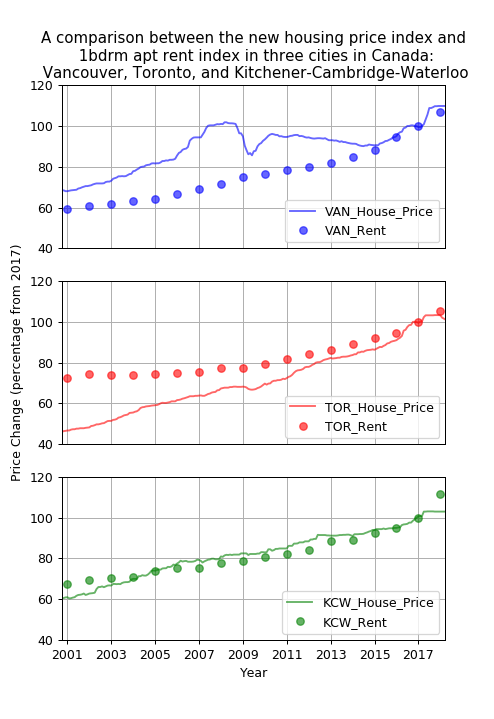

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

#importing the housing price index from Statistics Canada for  Canada, Toronto, Kitchener-Cambridge-Waterloo and Vancouver  
df = pd.read_csv('Statistics-Canada-HPI.csv', sep=';', engine='python', skiprows=5,skipfooter=11)

# Find the index of each City and seperate the dataframe based on the Cities and cleaning up the data
ind=df[df['Reference period']=='October 2000']

df_CND=df.copy()[ind.index[0]:ind.index[1]]
df_CND.drop(['Geography','Land only'],axis=1,inplace=True)

df_TOR=df.copy()[ind.index[1]:ind.index[2]]
df_TOR.drop(['Geography','Land only'],axis=1,inplace=True)

df_KCW=df.copy()[ind.index[2]:ind.index[3]]
df_KCW.drop(['Geography','Land only'],axis=1,inplace=True)

df_VAN=df.copy()[ind.index[3]:]
df_VAN.drop(['Geography','Land only'],axis=1,inplace=True)

# Join all the four tables toghether based on the Reference period
Table1 = pd.merge(df_CND, df_TOR,how='left', left_on='Reference period', right_on='Reference period',suffixes=('_CND', '_TOR'))
Table2 = pd.merge(df_KCW, df_VAN,how='left', left_on='Reference period', right_on='Reference period',suffixes=('_KCW', '_VAN'))
Table = pd.merge(Table1, Table2,how='left', left_on='Reference period', right_on='Reference period')


# Convert the Reference period to datetime and use it as the index of the dataframe
time_period=pd.Series(np.arange('2000-10-01', '2019-03-01', dtype='datetime64[M]'))

Table.drop(['Reference period'], axis=1,inplace=True)
Table.set_index(time_period, inplace=True)


# Import the sencond set of data, the rent of the one bed room apt in Toronto, Kitchener-Cambridge-Waterloo and Vancouver  
df3 = pd.read_csv('Average_rents.csv',sep=',', engine='python', skiprows=4,skipfooter=7)
df3.drop(['Type of structure','Type of unit'],axis=1,inplace=True)
df3.drop([0],axis=0,inplace=True)
df3.rename(columns={'Kitchener-Cambridge-Waterloo, Ontario':'KCW',
                    'Toronto, Ontario':'TOR','Vancouver, British Columbia':'VAN'},inplace=True)

# Convert the rents from sting into float
df3['KCW']=df3['KCW'].str.replace(',','').astype('float64')
df3['TOR']=df3['TOR'].str.replace(',','').astype('float64')
df3['VAN']=df3['VAN'].str.replace(',','').astype('float64')


# Since the housing price index is normalized  to the prices in 2016 , 
#the rents are normalized here to be comparable to the housing price index
norm=df3[df3['Reference period']==2016.0]

a=df3['KCW'].iloc[norm.index[0]]
df3['KCW']=round((df3['KCW'])/a*100,2)

b=df3['TOR'].iloc[norm.index[0]]
df3['TOR']=round((df3['TOR'])/b*100,2)

c=df3['VAN'].iloc[norm.index[0]]
df3['VAN']=round((df3['VAN'])/c*100,2)

# Convert the Reference period to datetime and use it as the index of the dataframe
time_period3=pd.Series(np.arange('2000-01-01', '2019-01-01', dtype='datetime64[Y]'))

df3.drop(['Reference period'], axis=1,inplace=True)
df3.set_index(time_period3, inplace=True)



# Start the Visualization
plt.figure(figsize=(5.5,8))



ax1=plt.subplot(3,1, 1)
plt.title('A comparison between the new housing price index and\n 1bdrm apt rent index in three cities in Canada:\n Vancouver, Toronto, and Kitchener-Cambridge-Waterloo')
ax1.plot(Table.index,Table['House only_VAN'],'-',label='VAN_House_Price',color='blue',alpha=0.6)
ax1.plot(df3.index,df3['VAN'],'o',label='VAN_Rent',color='blue',alpha=0.6)
ax1.set_xlim('2000-10-01','2018-03-28')
ax1.set_ylim(40,120)
ax1.tick_params(bottom=False, labelbottom=False)
ax1.legend(loc=4)
ax1.grid()

ax2=plt.subplot(3,1, 2)
ax2.plot(Table.index,Table['House only_TOR'],'-',label='TOR_House_Price',color='red',alpha=0.6)
ax2.plot(df3.index,df3['TOR'],'o',label='TOR_Rent',color='red',alpha=0.6)
ax2.set_xlim('2000-10-01','2018-03-28')
ax2.set_ylim(40,120)
ax2.tick_params(bottom=False, labelbottom=False)
ax2.legend(loc=4)
ax2.grid()
plt.ylabel('Price Change (percentage from 2017)')


ax3=plt.subplot(3,1, 3)
ax3.plot(Table.index,Table['House only_KCW'],'-',label='KCW_House_Price',color='green',alpha=0.6)
ax3.plot(df3.index,df3['KCW'],'o',label='KCW_Rent',color='green',alpha=0.6)
ax3.set_xlim('2000-10-01','2018-03-28')

ax3.set_ylim(40,120)
ax3.legend(loc=4)
ax3.grid()


plt.xlabel('Year')
